# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd

root_dir = '' # this is to be defined by you 
local_path = 'dataset/' # store the related data files in this folder

data_dir = root_dir + local_path
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

/Users/winson/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/winson/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


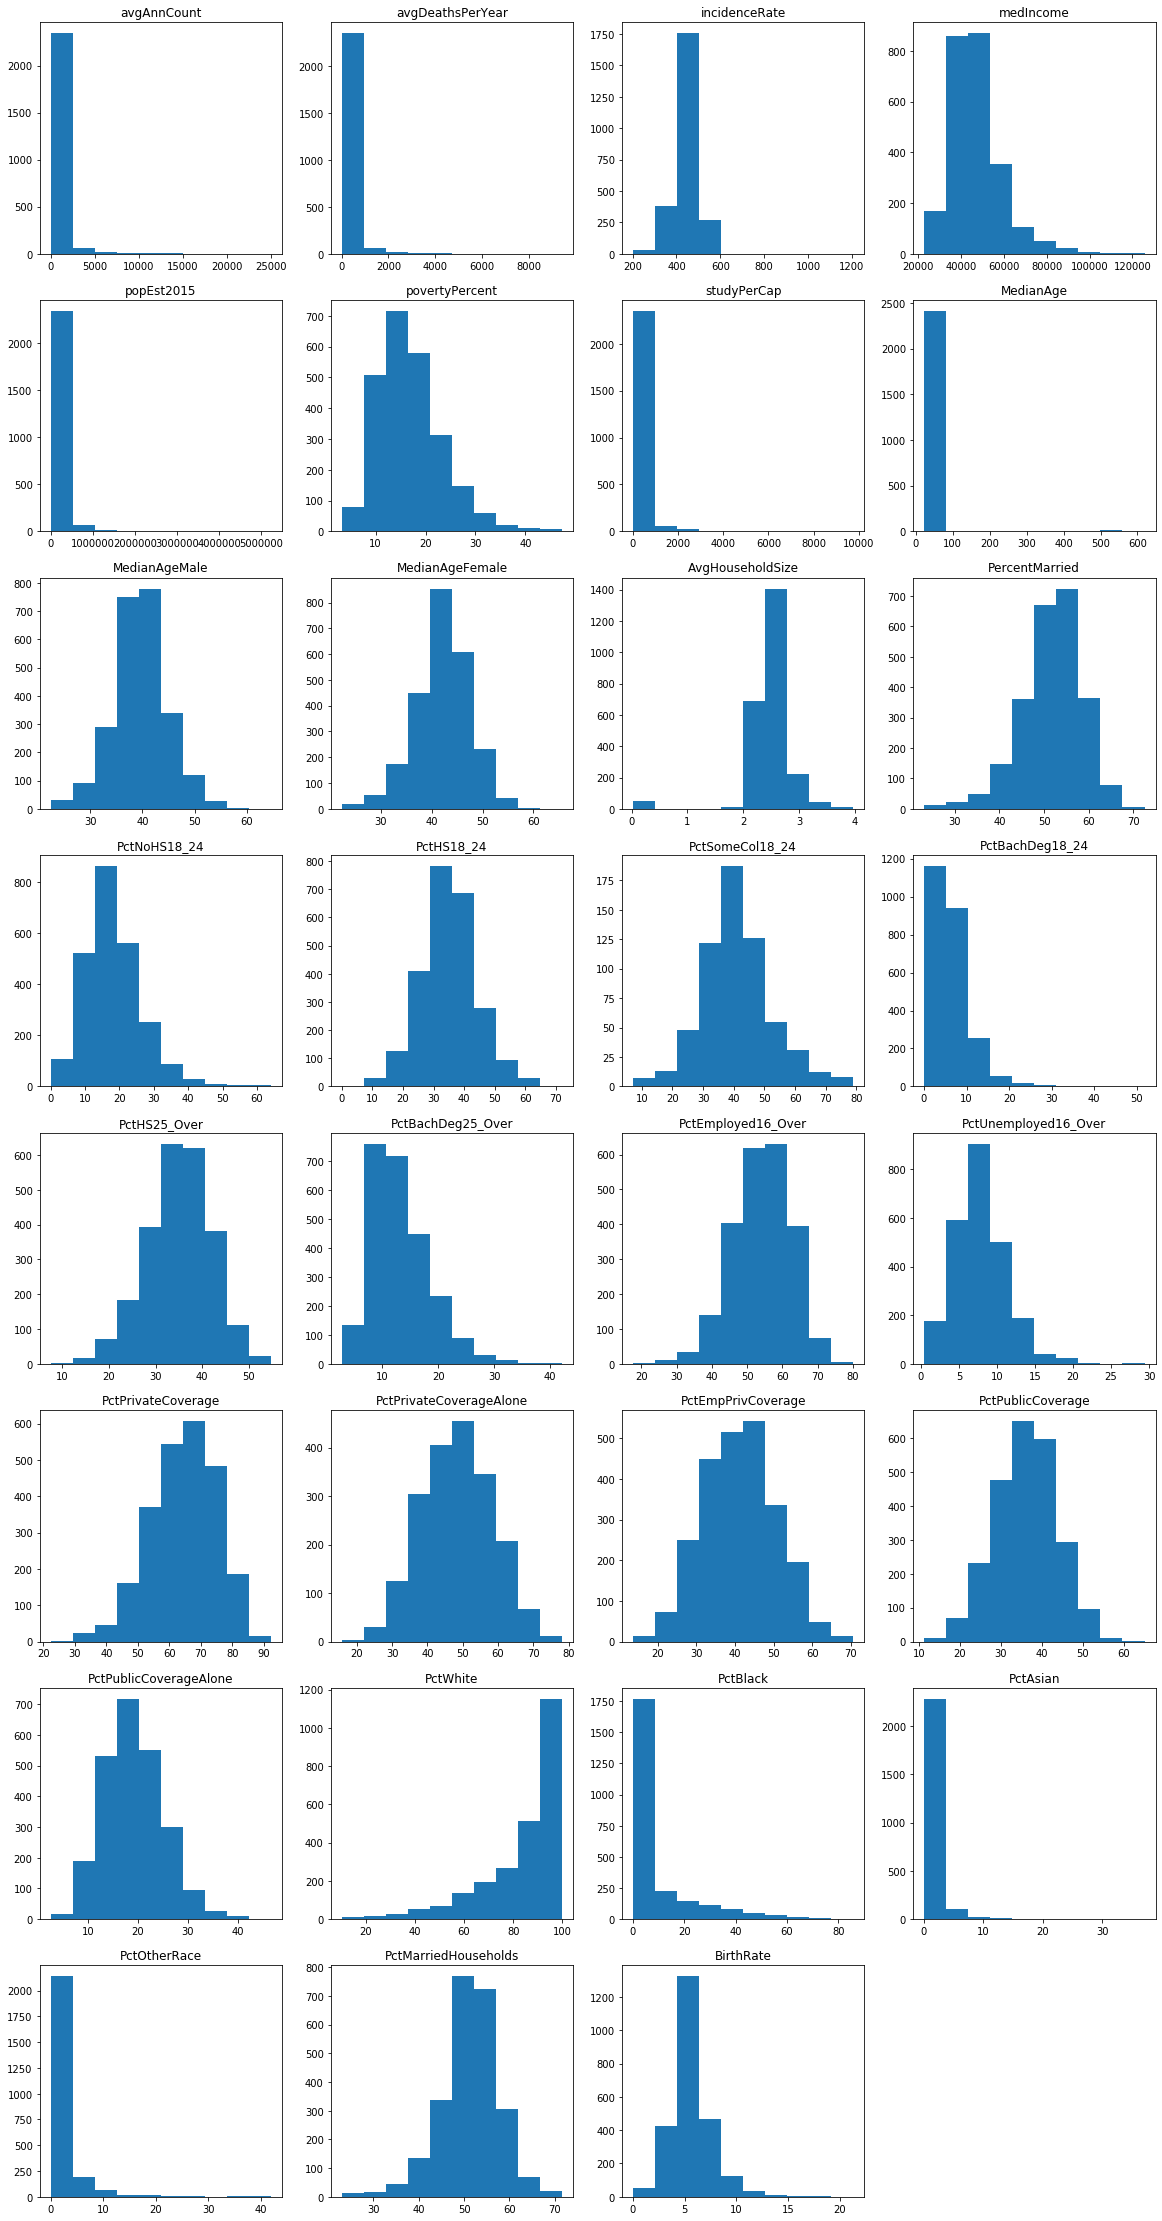

In [2]:
import matplotlib.pyplot as plt

    
def read_train_data():
    training_data = pd.read_csv(training_data_path)
    training_target = pd.read_csv(training_targets_path)
    return training_data, training_target

def plot_sub_hist(data, title, index):
    plt.subplot(8, 4, index + 1)
    plt.hist(data)
    plt.title(title)
    
def plot_all_feature_hist(training_data):
    plt.figure(figsize=(20,40))
    for i, feature_name in enumerate(training_data.columns):
        plot_sub_hist(training_data[feature_name], feature_name, i)
    plt.show()
    
def calculate_correlations(data, target):
    correlations = dict()
    for feature_name in data.columns:
        feature = data[feature_name]
        correlations[feature_name] = target.corrwith(feature)
    return correlations

def sort_correlations(corr):
    return sorted(corr, key=lambda feature: abs(corr[feature].item()), reverse=True)

def plot_scatter(df, features):
    pd.plotting.scatter_matrix(df[features])



training_data, training_target = read_train_data()
plot_all_feature_hist(training_data)

As we inspect through the distributions of features, we can find the features that do not have the Gaussian Distribution which are 'avgAnnCount', 'avgDeathsPerYear', 'popEst2015', 'studyPerCap', 'MedianAge', 'PctBachDeg18_24', 'PctWhite', 'PctBlack', 'PctAsian', and 'PctOtherRace'. Most of them have the centralised data around a data point and some outliners around while others are fitted the Gaussian distribution.

In [97]:
correlations = calculate_correlations(training_data, training_target)
# the variable c is for displaying the correlation only
c =pd.DataFrame(correlations)
c

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
TARGET_deathRate,-0.150019,-0.094048,0.443983,-0.416607,-0.130122,0.41326,-0.024729,-0.000039,-0.027263,0.008665,...,-0.35505,-0.259006,0.391899,0.439734,-0.174521,0.23638,-0.181948,-0.182602,-0.290645,-0.088543


['PctBachDeg25_Over', 'incidenceRate', 'PctPublicCoverageAlone', 'medIncome', 'povertyPercent']


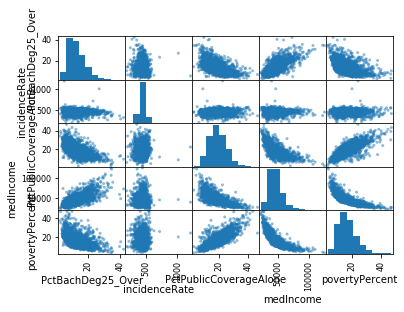

In [4]:
sorted_corr = sort_correlations(correlations)
print(sorted_corr[:5])
plot_scatter(training_data, sorted_corr[:5])

In the scatter matrix, we can clearly find the linear correlation between 'povertryPercent' and 'PctPublicCoverageAlone'. As the former feature goes up, the latter increase at the same time. In addition, 'povertryPercent' also has the inverse linear correlation with "medIncome" which shows a completely reversal trend.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [5]:
training_data.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
dtype: i

In [105]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler

class DataFrameSelector(BaseEstimator):

    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values


def preprocessing(data):
    outl_pipeline = Pipeline([
        ('selector', DataFrameSelector(outl_attributes)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', RobustScaler())
    ])
    norm_pipeline = Pipeline([
        ('selector', DataFrameSelector(norm_attributes)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])
    full_pipeline = FeatureUnion(transformer_list=[
        ("outl_pipeline", outl_pipeline),
        ("norm_pipeline", norm_pipeline)
    ])
    
    pre_data = full_pipeline.fit_transform(data)
    return pre_data
    
# The outliner_index select the indexes of the features that do not fit the Gaussian distribution
outliner_index = [0, 1, 4, 6, 7, 15, 25, 26, 27, 28]

# The ignored_index additionally selectet the indexes of the features that contains NaN values
ignored_index = outliner_index + [14, 18, 21]


outl_attributes = [training_data.columns[i] for i in outliner_index]
norm_attributes = [i for index, i in enumerate(training_data.columns) if not index in ignored_index]


pre_train_data = preprocessing(training_data)
pre_train_target = training_target.to_numpy().flatten()
pre_train_data.shape

(2438, 28)

The features which has NaN value will be ignored.
The features with outliners will go through the robust scalers.
The features without outliners will go through the standard scalers.

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

RANDOM_STATE = 50


def plot_search_graph(grid_search, param="alpha", spec=False):
    cvres = grid_search.cv_results_
    rf_result = dict()
    for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
        if (spec and params['max_features'] == 18) or (not spec) :
            rf_result[params[param]] = np.sqrt(-mean_score)

    paras = sorted(rf_result.keys())
    plt.plot(paras, [rf_result[key] for key in paras])
    plt.show()
    
def print_search(grid_search):  
    print("Best parameter is:", grid_search.best_params_)
    print("Best score is:", np.sqrt(-grid_search.best_score_))

def rmse_score_cal(model, x_t, y_t):
    pred_test = model.predict(x_t)
    lin_mse = mean_squared_error(y_t, pred_test)
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

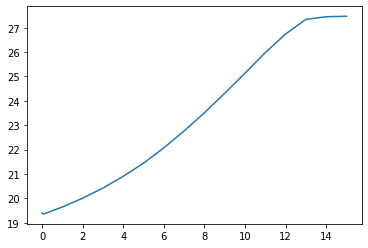

Lasso:
Best parameter is: {'alpha': 0.0738}
Best score is: 19.362617273425414


In [107]:
param_grid_lasso = [{'alpha': [1*(i+1) for i in range(15)]}, 
                    {'alpha': [0.001*(i+1) for i in range(100)]}, 
                    {'alpha': [0.0001*(i)+0.07 for i in range(100)]}]
grid_search_lasso = GridSearchCV(linear_model.Lasso(random_state=RANDOM_STATE), param_grid_lasso, cv=5,scoring='neg_mean_squared_error')
grid_search_lasso.fit(pre_train_data, pre_train_target)
plot_search_graph(grid_search_lasso)
print('Lasso:')
print_search(grid_search_lasso)
lasso_alpha = grid_search_lasso.best_params_['alpha']

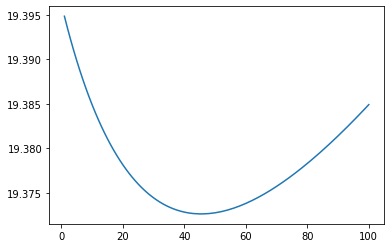

Ridge:
Best parameter is: {'alpha': 45.485299999999995}
Best score is: 19.37263527920525


In [108]:
param_grid_ridge = [{'alpha': [1*(i+1) for i in range(100)]}, 
                     {'alpha': [0.01*(i+1)+44 for i in range(200)]},
                     {'alpha': [0.0001*(i+1)+45.48 for i in range(200)]}
                    ]
grid_search_ridge = GridSearchCV(linear_model.Ridge(random_state=RANDOM_STATE), param_grid_ridge, cv=5,scoring='neg_mean_squared_error')
grid_search_ridge.fit(pre_train_data, pre_train_target)
plot_search_graph(grid_search_ridge)
print('Ridge:')
print_search(grid_search_ridge)
ridge_alpha = grid_search_ridge.best_params_['alpha']

In [109]:
from sklearn.model_selection import cross_val_score


ols = linear_model.LinearRegression()
ols_scores = cross_val_score(ols, pre_train_data, pre_train_target, scoring="neg_mean_squared_error", cv=5)
ols_rmse_scores=np.sqrt(-ols_scores)

all_scores = {"ols": ols_rmse_scores.mean(), 
              "lasso": np.sqrt(-grid_search_lasso.best_score_), 
              "ridge": np.sqrt(-grid_search_ridge.best_score_)}

print(all_scores)

{'ols': 19.386023631473726, 'lasso': 19.362617273425414, 'ridge': 19.37263527920525}


Using cross validation for OLS, Lasso, and Ridge models, they get the RMSE mean score for their best weight as 19.38, 19.36, and 19.37, respectively. We can observe the lasso regression model obtained the best score by using RMSE for evaluation.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [110]:
def get_5_importance(model, isrf=False):
    weights = model.feature_importances_ if isrf else model.coef_ 
    model_importance = [abs(i) for i in weights]
    sorted_importance = sorted(model_importance, reverse=True)[:5]
    coef_index = [model_importance.index(i) for i in sorted_importance]

    attributes = [outl_attributes[i] if i <len(outliner_index) else 
                  norm_attributes[i - len(outliner_index)] for i in coef_index]
    return attributes

attributes = get_5_importance(grid_search_lasso.best_estimator_)
print('The five most important features are:', attributes)

The five most important features are: ['incidenceRate', 'PctBachDeg25_Over', 'PctPrivateCoverage', 'PctMarriedHouseholds', 'PercentMarried']


incidenceRate: Mean per capita (100,000) cancer diagoses


PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 


PctPrivateCoverage: Percent of county residents with private health coverage


PctMarriedHouseholds: Percent of married households


PercentMarried: Percent of county residents who are married

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

In [82]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf  = [{'max_features':[18], 'n_estimators': [(i+1)+105 for i in range(10)]},
    {'max_features':[18], 'n_estimators': [6*(i+1)+90 for i in range(10)]},
    {'max_features':[18], 'n_estimators': [30*(i+1) for i in range(6)]},
    {'max_features':[3*(i+1) for i in range(8)], 'n_estimators': [10*(i+1) for i in range(10)]},
                 ]


all_rf = RandomForestRegressor(random_state=RANDOM_STATE)
grid_search_rf = GridSearchCV(all_rf, param_grid_rf, cv=5,scoring='neg_mean_squared_error')
grid_search_rf.fit(pre_train_data, pre_train_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                          'n_estimators': [106, 107, 108, 109, 110, 111, 112,
                                           

p.s. The part above may need to run a few minutes.

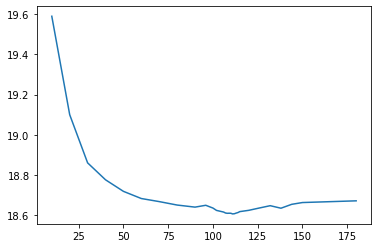

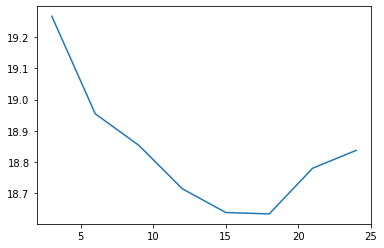

Random Forest:
Best parameter is: {'max_features': 18, 'n_estimators': 111}
Best score is: 18.605130575298325


In [93]:
plot_search_graph(grid_search_rf, param='n_estimators', spec=True)
plot_search_graph(grid_search_rf, param='max_features')


print("Random Forest:")
print_search(grid_search_rf)
rf_num_e = grid_search_rf.best_params_['n_estimators']
rf_max_f = grid_search_rf.best_params_['max_features']

In [85]:
print("Random Forest mean score:", np.sqrt(-grid_search_rf.best_score_))
print("Lasso mean score:", np.sqrt(-grid_search_lasso.best_score_))

Random Forest mean score: 18.605130575298325
Lasso mean score: 19.362617273425414


We can see the much lower RMSE mean score by using cross-validation compared between the Random Forest regression model and the Lasso regression model, demonstrating the former model's superiority.

In [87]:
print('The five most important features are:', get_5_importance(grid_search_rf.best_estimator_, isrf=True))

The five most important features are: ['incidenceRate', 'PctBachDeg25_Over', 'medIncome', 'PctHS25_Over', 'PctPublicCoverageAlone']


Compare to the Lasso, the top two relevent features are the same, and those features also appear as the top two features which have the most correlation with the target values. However, the remaining features demonstarte a hugh difference. While the 3rd, 4th, and 5th featrues in random forests take the 4th, 6th, and 3rd places in the correlation with target, the 3rd, 4th, and 5th featrues in lasso take the 9th, 12th, and 15th place in the correlation.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [111]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
final_model = RandomForestRegressor(n_estimators=rf_num_e, max_features=rf_max_f, random_state=50)
final_model.fit(pre_train_data, pre_train_target)
# Next write the lines of code required to predict on unseen test data and evaluate your predictions
pre_test_data = preprocessing(test_data)
pre_test_targets = test_targets.to_numpy().flatten()


final_predition = final_model.predict(pre_test_data)
lin_mse = mean_squared_error(pre_test_targets, final_predition)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

22.45241924170937
